## Problem 3: Framingham Heart Study
a) Build a logistic regression model.  

First improt and declair necessary model and fuction.

In [1]:
import numpy as np
import pandas as pd
import os
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import warnings

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve

Import data from the same file direction.

In [2]:
path = os.getcwd() + "/Framingham.csv"
CHD = pd.read_csv(path)
CHD.info()
CHD.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3658 entries, 0 to 3657
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3658 non-null   int64  
 1   age              3658 non-null   int64  
 2   education        3658 non-null   object 
 3   currentSmoker    3658 non-null   int64  
 4   cigsPerDay       3658 non-null   int64  
 5   BPMeds           3658 non-null   int64  
 6   prevalentStroke  3658 non-null   int64  
 7   prevalentHyp     3658 non-null   int64  
 8   diabetes         3658 non-null   int64  
 9   totChol          3658 non-null   int64  
 10  sysBP            3658 non-null   float64
 11  diaBP            3658 non-null   float64
 12  BMI              3658 non-null   float64
 13  heartRate        3658 non-null   int64  
 14  glucose          3658 non-null   int64  
 15  TenYearCHD       3658 non-null   int64  
dtypes: float64(3), int64(12), object(1)
memory usage: 457.4+ KB


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,College,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0,46,High school/GED,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1,48,Some high school,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,0,61,Some college/vocational school,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,0,46,Some college/vocational school,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0


Check how many different types there are in the categorical data in the fearure.  

In [3]:
CHD['education'].unique()

array(['College', 'High school/GED', 'Some high school',
       'Some college/vocational school'], dtype=object)

Using sklearn's function to split Split the data with 75% for the training set and 25% for the testing set, and print out brief result.

In [4]:
CHD_train, CHD_test = train_test_split(CHD, test_size=0.25, random_state=88)
CHD_train.shape, CHD_test.shape

((2743, 16), (915, 16))

Check the proportion of result in the training set.

In [5]:
CHD_false = np.sum(CHD_train['TenYearCHD'] == 0)
CHD_true = np.sum(CHD_train['TenYearCHD'] == 1)

print(pd.Series({'0': CHD_false, '1': CHD_true}))

0    2332
1     411
dtype: int64


Run the first logistic regression model by the training data.

In [6]:
logCHD = smf.logit(formula = 'TenYearCHD ~ male + age + education + currentSmoker + cigsPerDay + BPMeds + prevalentStroke + prevalentHyp + diabetes + totChol + sysBP + diaBP + BMI + heartRate + glucose',
                   data = CHD_train).fit()

print(logCHD.summary())

Optimization terminated successfully.
         Current function value: 0.374053
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 2743
Model:                          Logit   Df Residuals:                     2725
Method:                           MLE   Df Model:                           17
Date:                Sat, 01 Oct 2022   Pseudo R-squ.:                  0.1145
Time:                        14:30:18   Log-Likelihood:                -1026.0
converged:                       True   LL-Null:                       -1158.7
Covariance Type:            nonrobust   LLR p-value:                 1.499e-46
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                 

Remove insignificant variables: prevalentStroke  

In [7]:
logCHD_01 = smf.logit(formula = 'TenYearCHD ~ male + age + education + currentSmoker + cigsPerDay + BPMeds + prevalentHyp + diabetes + totChol + sysBP + diaBP + BMI + heartRate + glucose',
                   data = CHD_train).fit()
print(logCHD_01.summary())

Optimization terminated successfully.
         Current function value: 0.374055
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 2743
Model:                          Logit   Df Residuals:                     2726
Method:                           MLE   Df Model:                           16
Date:                Sat, 01 Oct 2022   Pseudo R-squ.:                  0.1145
Time:                        14:30:18   Log-Likelihood:                -1026.0
converged:                       True   LL-Null:                       -1158.7
Covariance Type:            nonrobust   LLR p-value:                 3.625e-47
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                 

Remove insignificant variables: currentSmoker

In [8]:
logCHD_02 = smf.logit(formula = 'TenYearCHD ~ male + age + education + cigsPerDay + BPMeds + prevalentHyp + diabetes + totChol + sysBP + diaBP + BMI + heartRate + glucose',
                   data = CHD_train).fit()
print(logCHD_02.summary())

Optimization terminated successfully.
         Current function value: 0.374070
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 2743
Model:                          Logit   Df Residuals:                     2727
Method:                           MLE   Df Model:                           15
Date:                Sat, 01 Oct 2022   Pseudo R-squ.:                  0.1145
Time:                        14:30:18   Log-Likelihood:                -1026.1
converged:                       True   LL-Null:                       -1158.7
Covariance Type:            nonrobust   LLR p-value:                 8.777e-48
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                 

Remove insignificant variables: BMI

In [9]:
logCHD_03 = smf.logit(formula = 'TenYearCHD ~ male + age + education + cigsPerDay + BPMeds + prevalentHyp + diabetes + totChol + sysBP + diaBP + heartRate + glucose',
                   data = CHD_train).fit()
print(logCHD_03.summary())

Optimization terminated successfully.
         Current function value: 0.374169
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 2743
Model:                          Logit   Df Residuals:                     2728
Method:                           MLE   Df Model:                           14
Date:                Sat, 01 Oct 2022   Pseudo R-squ.:                  0.1142
Time:                        14:30:18   Log-Likelihood:                -1026.3
converged:                       True   LL-Null:                       -1158.7
Covariance Type:            nonrobust   LLR p-value:                 2.559e-48
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                 

Remove insignificant variables: BPMeds  

In [10]:
logCHD_04 = smf.logit(formula = 'TenYearCHD ~ male + age + education + cigsPerDay + prevalentHyp + diabetes + totChol + sysBP + diaBP + heartRate + glucose',
                   data = CHD_train).fit()
print(logCHD_04.summary())

Optimization terminated successfully.
         Current function value: 0.374273
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 2743
Model:                          Logit   Df Residuals:                     2729
Method:                           MLE   Df Model:                           13
Date:                Sat, 01 Oct 2022   Pseudo R-squ.:                  0.1140
Time:                        14:30:18   Log-Likelihood:                -1026.6
converged:                       True   LL-Null:                       -1158.7
Covariance Type:            nonrobust   LLR p-value:                 7.286e-49
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                 

Remove insignificant variables: diabetes

In [11]:
logCHD_05 = smf.logit(formula = 'TenYearCHD ~ male + age + education + cigsPerDay + prevalentHyp + totChol + sysBP + diaBP + heartRate + glucose',
                   data = CHD_train).fit()
print(logCHD_05.summary())

Optimization terminated successfully.
         Current function value: 0.374392
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 2743
Model:                          Logit   Df Residuals:                     2730
Method:                           MLE   Df Model:                           12
Date:                Sat, 01 Oct 2022   Pseudo R-squ.:                  0.1137
Time:                        14:30:18   Log-Likelihood:                -1027.0
converged:                       True   LL-Null:                       -1158.7
Covariance Type:            nonrobust   LLR p-value:                 2.075e-49
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                 

Remove insignificant variables: totChol

In [12]:
logCHD_06 = smf.logit(formula = 'TenYearCHD ~ male + age + education + cigsPerDay + prevalentHyp + sysBP + diaBP + heartRate + glucose',
                   data = CHD_train).fit()
print(logCHD_06.summary())

Optimization terminated successfully.
         Current function value: 0.374588
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 2743
Model:                          Logit   Df Residuals:                     2731
Method:                           MLE   Df Model:                           11
Date:                Sat, 01 Oct 2022   Pseudo R-squ.:                  0.1132
Time:                        14:30:18   Log-Likelihood:                -1027.5
converged:                       True   LL-Null:                       -1158.7
Covariance Type:            nonrobust   LLR p-value:                 6.930e-50
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                 

Since all three categorical variables of education is insignificant, remove it from the logistic regression.  

In [13]:
logCHD_07 = smf.logit(formula = 'TenYearCHD ~ male + age + cigsPerDay + prevalentHyp + sysBP + diaBP + heartRate + glucose',
                   data = CHD_train).fit()
print(logCHD_07.summary())

Optimization terminated successfully.
         Current function value: 0.375727
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 2743
Model:                          Logit   Df Residuals:                     2734
Method:                           MLE   Df Model:                            8
Date:                Sat, 01 Oct 2022   Pseudo R-squ.:                  0.1105
Time:                        14:30:18   Log-Likelihood:                -1030.6
converged:                       True   LL-Null:                       -1158.7
Covariance Type:            nonrobust   LLR p-value:                 8.426e-51
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -7.3606      0.695    -10.595      0.000      -8.722      -5.999
male             0.5737

Remove insignificant variables: heartRate

In [14]:
logCHD_08 = smf.logit(formula = 'TenYearCHD ~ male + age + cigsPerDay + prevalentHyp + sysBP + diaBP + glucose',
                   data = CHD_train).fit()
print(logCHD_08.summary())

Optimization terminated successfully.
         Current function value: 0.375943
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 2743
Model:                          Logit   Df Residuals:                     2735
Method:                           MLE   Df Model:                            7
Date:                Sat, 01 Oct 2022   Pseudo R-squ.:                  0.1100
Time:                        14:30:18   Log-Likelihood:                -1031.2
converged:                       True   LL-Null:                       -1158.7
Covariance Type:            nonrobust   LLR p-value:                 2.393e-51
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -7.7059      0.620    -12.435      0.000      -8.921      -6.491
male             0.5897

Remove insignificant variables: diaBP           

In [15]:
logCHD_09 = smf.logit(formula = 'TenYearCHD ~ male + age + cigsPerDay + prevalentHyp + sysBP + glucose',
                   data = CHD_train).fit()
print(logCHD_09.summary())

Optimization terminated successfully.
         Current function value: 0.376223
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 2743
Model:                          Logit   Df Residuals:                     2736
Method:                           MLE   Df Model:                            6
Date:                Sat, 01 Oct 2022   Pseudo R-squ.:                  0.1094
Time:                        14:30:19   Log-Likelihood:                -1032.0
converged:                       True   LL-Null:                       -1158.7
Covariance Type:            nonrobust   LLR p-value:                 7.471e-52
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -8.0647      0.550    -14.664      0.000      -9.143      -6.987
male             0.5706

After 9 times of evaluations, we eliminate the insignificant variables from the model to have a better interpretation of the model.  
According the the logistic regression model, the posibility of experienced coronary heart disease within 10
years of first examination is more related to the observation's gender, age, number of cigarettes per day, currently hypertensive, systolic blood pressure, blood glucose level.
The corfficient of the Intercept in negative, indicates that the probability of having the coronary heart disease within10
years will be < 0.5.  
Gender and currently hypertensive could have a greater effect on whether goning to have a coronary heart disease within 10
years.

Using threshold = 0.4 to evaluate the model's Accuracy, True Positive Rate (TPR) and False Positive Rate (FPR)

In [16]:
y_test = CHD_test['TenYearCHD']
y_prob = logCHD_09.predict(CHD_test)
y_pred = pd.Series([1 if x > 0.4 else 0 for x in y_prob], index=y_prob.index)

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[747  22]
 [116  30]]


In [17]:
print(cm.ravel())

[747  22 116  30]


In [18]:
#ACC
(cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())

0.8491803278688524

In [19]:
#TPR
(cm.ravel()[3])/(cm.ravel()[2]+cm.ravel()[3])

0.2054794520547945

In [20]:
#FPR
(cm.ravel()[1])/(cm.ravel()[0]+cm.ravel()[1])

0.02860858257477243

According to the outcome of the confusion matrix, our model's Accuracy= 0.85, TPR=0.029, FPR=0.205.  Though the Accuracy is reasonably high, the TPR is too low.  
True Positive Rate is the proportion of having CHD in 10 years (Yi= 1) that we correctly identified as high-risk group (Pr(Yi= 1) > 0.4).  
False Positive Rate is the proportion of not having CHD in 10 years (Yi= 0) incorrectly identified as high risk group (Pr(Yi= 1) > 0.4)

As our analysis is to predict whether the observation would have a CHD in 10 years, it is better that the TPR rate is higher to not misjudge persons that have risk to "no risk", preventing them from losing further awareness. On the other hand, the FPR rate is not that important while misjudging those no-risk persons wouldn't cause a bad result.  

b) ROC Curve

Building the ROC curve from the logistic regression model(logCHD_09) on the testing set.

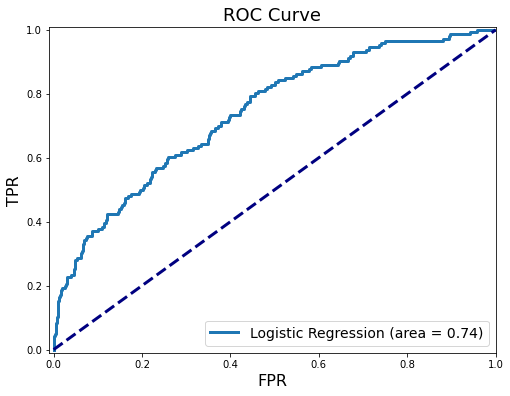

In [21]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.legend(loc='lower right', fontsize=14)
plt.show()

Set the class weight of TenYearCHD to balanced and build the logistic regression model, confusion matrix, and the ROC curve.
Frist set the dataset with dummy variables.

In [22]:
CHD_train_balance = pd.get_dummies(data=CHD_train, drop_first=True)
CHD_test_balance = pd.get_dummies(data=CHD_test, drop_first=True)

cols = CHD_train_balance.columns[CHD_train_balance.columns != "TenYearCHD"]
CHD_test_balance

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_High school/GED,education_Some college/vocational school,education_Some high school
1824,0,40,1,5,0,0,0,0,143,125.5,80.0,21.99,71,95,0,0,1,0
1221,0,51,1,15,0,0,0,0,345,142.0,88.0,19.05,80,73,0,0,0,1
1662,1,61,1,20,0,0,0,0,167,105.0,67.5,27.28,88,86,0,1,0,0
1432,0,40,1,5,0,0,0,0,174,130.0,86.0,25.05,80,83,0,1,0,0
2341,1,44,1,20,0,0,0,0,225,130.0,77.5,21.19,92,82,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,1,53,1,30,0,0,0,0,189,110.0,67.5,23.59,60,63,0,0,0,0
2641,0,43,1,10,0,0,0,0,269,139.0,96.0,24.38,77,71,0,0,0,1
2973,1,57,1,15,0,0,0,1,245,132.0,77.0,23.01,76,207,0,0,1,0
1062,0,38,1,9,0,0,0,0,160,102.5,67.5,21.16,90,68,0,1,0,0


Use sklearn function to set the class weight to balance.

In [23]:
bal_model = LogisticRegression(class_weight='balanced')
bal_model.fit(X=CHD_train_balance[cols], y=CHD_train_balance['TenYearCHD'])

C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [24]:
print(bal_model.score(X=CHD_train_balance[cols], y=CHD_train_balance['TenYearCHD'])) 

0.6543930003645644


In [25]:
y_pred_bal = bal_model.predict(CHD_test_balance[cols])
cm_bal = confusion_matrix(y_test, y_pred_bal)
cm_bal

array([[485, 284],
       [ 53,  93]], dtype=int64)

C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


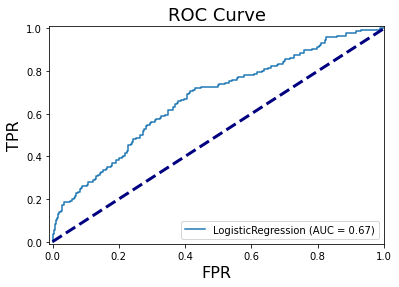

In [26]:
plot_roc_curve(bal_model, CHD_test_balance[cols], CHD_test_balance['TenYearCHD'])
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.legend(loc='lower right', fontsize=10)
plt.show()

The Accuracy of the balanced class weight model is 0.65, much worse than our logistic regression model. And the AUC and FPR are much worse than the previous one.

However, the TPR rate raise from 0.205 to 93/93+53 = 0.637, which significantly raise the proportion correctly identified as a high-risk group of having CHD in 10 years.

# Problem 4: Nissan Rogue Sales Study

Import data from the same file direction.

In [27]:
path = os.getcwd() + "/Rogue_242.csv"
sales = pd.read_csv(path)
sales.info()
sales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MonthNumeric  162 non-null    int64  
 1   MonthFactor   162 non-null    object 
 2   Year          162 non-null    int64  
 3   RogueSales    162 non-null    int64  
 4   Unemployment  162 non-null    float64
 5   RogueQueries  162 non-null    int64  
 6   CPIAll        162 non-null    float64
 7   CPIEnergy     162 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 10.2+ KB


,MonthNumeric,MonthFactor,Year,RogueSales,Unemployment,RogueQueries,CPIAll,CPIEnergy
0,1,January,2008,5435,5.0,18,212.174,226.775
1,2,February,2008,5223,4.9,11,212.687,229.731
2,3,March,2008,6873,5.1,18,213.448,233.349
3,4,April,2008,5814,5.0,17,213.942,234.778
4,5,May,2008,7467,5.4,17,215.208,243.924


Using order data to present the data of "Year" and "MonthFactor", ex. (January, 2008) = 0, (February, 2008) = 1 etc. 

In [28]:
sales_order = sales.copy()
sales_order.insert(0, 'Year_Month', range(0, 0 + len(sales_order)))

sales_order.head()

,Year_Month,MonthNumeric,MonthFactor,Year,RogueSales,Unemployment,RogueQueries,CPIAll,CPIEnergy
0,0,1,January,2008,5435,5.0,18,212.174,226.775
1,1,2,February,2008,5223,4.9,11,212.687,229.731
2,2,3,March,2008,6873,5.1,18,213.448,233.349
3,3,4,April,2008,5814,5.0,17,213.942,234.778
4,4,5,May,2008,7467,5.4,17,215.208,243.924


Chronological order could be useful when splitting datasets into training and testing data because the relationship between training and testing data could be using past data to predict future data.  
However, spiting time-series data with chronological order should be careful when the dataset isn't large enough or unexpected major factors exist in future testing data.  This could result in the training model overfit in the training data, causing very poor outcomes in the Out-of-Sample R square.

Because the result in spliting the Nissan Rogue Sales dataset with chronological order is very poor, the following analyze would use random split the dataset with 75% for the training set and 25% for the testing set.  

In [29]:
sales_train = sales_order.sample(frac=0.75, random_state=88)
sales_test = sales_order.drop(sales_train.index)

print(f"No. of training examples: {sales_train.shape[0]}")
print(f"No. of testing examples: {sales_test.shape[0]}")

No. of training examples: 122
No. of testing examples: 40


Run the linear regression with the order variable

In [30]:
sales_model = smf.ols(formula='RogueSales ~ Year_Month + Unemployment + RogueQueries + CPIAll + CPIEnergy',
                 data=sales_train).fit()

print(sales_model.summary())

                            OLS Regression Results                            
Dep. Variable:             RogueSales   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     110.1
Date:                Sat, 01 Oct 2022   Prob (F-statistic):           2.37e-42
Time:                        14:30:19   Log-Likelihood:                -1198.8
No. Observations:                 122   AIC:                             2410.
Df Residuals:                     116   BIC:                             2426.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      4.19e+05   7.02e+04      5.971   

According to the result of linear regression, we could state that the model is present reasonably well, regarding that the R square is pretty high at 0.826.  
However, the p-value of the features is a bit problematic, should not be all perfectly equal to 0.000. Further testing, such as VIF and OSR square, is needed to adjust the model.
Also, the standard error of the "Intercept" is high, which could indicate the model is unstable, any minor change in the data could result in big shifts in the result.  This shows that the dataset needs to be bigger or adjust. 

Input the formula to calculate the OSR2, RSS, and TSS

In [31]:
def OSR2(model, df_train, df_test, dependent_var):   
    
    y_test = df_test[dependent_var]
    y_pred = model.predict(df_test.loc[:, df_test.columns != dependent_var])
    RSS = np.sum((y_test - y_pred)**2)
    TSS = np.sum((y_test - np.mean(df_train[dependent_var]))**2)    
    
    return 1 - RSS/TSS

def RSS(model, df_train, df_test, dependent_var):   
    
    y_test = df_test[dependent_var]
    y_pred = model.predict(df_test.loc[:, df_test.columns != dependent_var])
    RSS = np.sum((y_test - y_pred)**2)
    
    return RSS

def TSS(model, df_train, df_test, dependent_var):   
    
    y_test = df_test[dependent_var]
    y_pred = model.predict(df_test.loc[:, df_test.columns != dependent_var])
    TSS = np.sum((y_test - np.mean(df_train[dependent_var]))**2)    
    
    return TSS

In [32]:
print(OSR2(sales_model, sales_train, sales_test, 'RogueSales'))
print(RSS(sales_model, sales_train, sales_test, 'RogueSales'))
print(TSS(sales_model, sales_train, sales_test, 'RogueSales'))

0.8317430646721384
640173878.4504983
3804739918.7621603


According to the result of Out of Sample R^2 = 0.83, the model is predicting the testing data well with the training data.

The total sum of squares (TSS) measures how much variation there is in the observed data, while the residual sum of squares(RSS)measures the variation in the error between the observed data and modeled values. Using two of them to present the proportion we have predicted wrong in the total variation, then 1 minus the wrong proportion to calculate the proportion of variation the model has predicted right.

The variance inflation factor (VIF) provides a measure of multicollinearity among the independent variables in a regression model. Variables with a VIF value higher than 10 indicate that they share a certain degree of collinear relationship with another variable, this should be eliminated or adjusted from the model.  

In [33]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIF(df, columns):
    
    values = sm.add_constant(df[columns]).values 
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    
    return pd.Series(vif[1:], index=columns)

In [34]:
VIF(sales_train, ["Year_Month", 'Unemployment', 'RogueQueries', 'CPIAll', 'CPIEnergy'])

Year_Month      167.975719
Unemployment      1.975626
RogueQueries     15.296606
CPIAll          180.399375
CPIEnergy         3.834654
dtype: float64

The result shows that "Year_Month" and "CPIAll" have a strong collinear relationship.  Their relationship could be interpreted that the changes of "CPIAll" is based on the year and "Year_Month" presents the changes of time, which result that their changes being similar to some degree. 
So we remove the "CPIAll" from the modle, because the higher VIF value.

In [35]:
sales_model_01 = smf.ols(formula='RogueSales ~ Year_Month + Unemployment + RogueQueries + CPIEnergy',
                 data=sales_train).fit()

print(sales_model_01.summary())

                            OLS Regression Results                            
Dep. Variable:             RogueSales   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     102.9
Date:                Sat, 01 Oct 2022   Prob (F-statistic):           2.29e-37
Time:                        14:30:19   Log-Likelihood:                -1213.5
No. Observations:                 122   AIC:                             2437.
Df Residuals:                     117   BIC:                             2451.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.608e+04   6012.886      4.338   

In [36]:
OSR2(sales_model_01, sales_train, sales_test, 'RogueSales')

0.769631208811933

In [37]:
VIF(sales_train, ['Year_Month', 'Unemployment', 'RogueQueries', 'CPIEnergy'])

Year_Month      11.285219
Unemployment     1.857027
RogueQueries    13.281378
CPIEnergy        1.082331
dtype: float64

The adjusted result then shows that "Year_Month" and "RogueQueries" have a slite collinear relationship. Their relationship could be interpreted that the changes of "RogueQueries" is also based on the year and "Year_Month" presents the changes of time, which result that their changes being similar to some degree. 
So we remove the "RogueQueries" from the modle, because the higher VIF value.

In [38]:
sales_model_02 = smf.ols(formula='RogueSales ~ Year_Month + Unemployment + CPIEnergy',
                 data=sales_train).fit()

print(sales_model_02.summary())

                            OLS Regression Results                            
Dep. Variable:             RogueSales   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     132.4
Date:                Sat, 01 Oct 2022   Prob (F-statistic):           1.31e-37
Time:                        14:30:19   Log-Likelihood:                -1215.5
No. Observations:                 122   AIC:                             2439.
Df Residuals:                     118   BIC:                             2450.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.966e+04   5816.021      5.100   

In [39]:
OSR2(sales_model_02, sales_train, sales_test, 'RogueSales')

0.7802394384496383

In [40]:
VIF(sales_train, ['Year_Month', 'Unemployment', 'CPIEnergy'])

Year_Month      1.606154
Unemployment    1.527642
CPIEnergy       1.066386
dtype: float64

After removing two feature, we eliminate the multicollinearity problem from the model

The adjusted model(sales_model_02) though preform slitely worse in R^2 and OSR^2 the original one(sales_model), but it avoid themulticollinearity in its fearure.  
According the adjusted model, it shows that we can predict the "RogueSales" base on the unemployment rate and the CPI for energy, which unemployment rate could effect more on the result because the higher coefficient value.  
"Year_Month" is an order variable, it can not expain which year or month has a better sales but just indicated that the sales will grow over the time.